# Линейная регрессия ML1.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MVID = pd.read_csv('MVID_101001_171001.txt')
SBER = pd.read_csv('SBER_101001_171001.txt')

In [4]:
SBER.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [5]:
df = pd.merge(SBER, MVID, on='<DATE>')
df.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [6]:
x = df['<CLOSE>_x']
y = df['<CLOSE>_y']

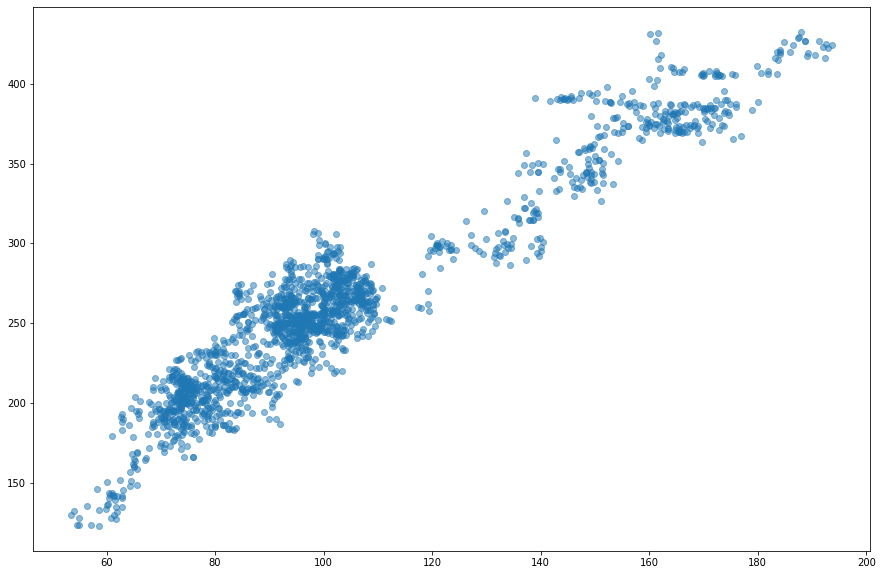

In [10]:
plt.figure(1, (15, 10))
plt.scatter(x, y, alpha=0.5)
plt.show()

In [13]:
class hypothesis(object):
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [38]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("Изначальная ошибка:", J)

0
0
Изначальная ошибка: 36271.58344889084


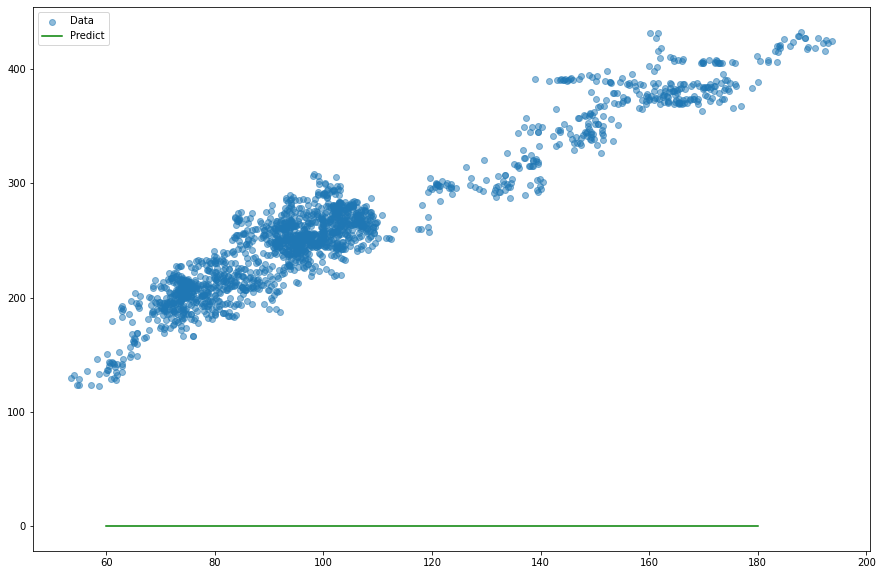

In [17]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure(1, (15, 10))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(X0, Y0, 'green', label='Predict')
plt.legend()
plt.show()

In [20]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("Ошибка после градиентного спуска:", J)

ошибка после градиентного спуска: 1449.980286843514


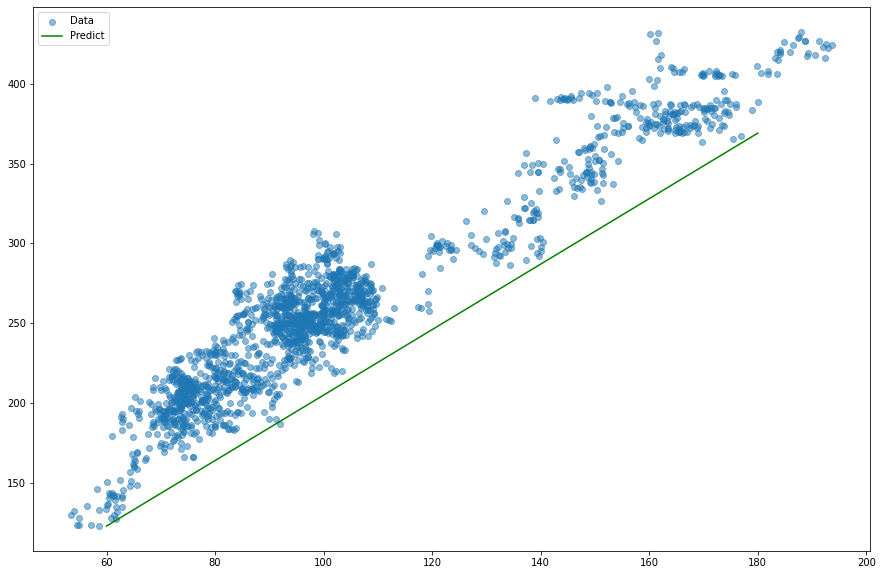

In [21]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure(1, (15, 10))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(X0, Y0, 'green', label='Predict')
plt.legend()
plt.show()

In [33]:
class hypothesis_high(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = self.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [34]:
hyp_new = hypothesis_high()
steps, errors = hyp_new.BGD(x, y)
J = hyp_new.error(x, y)
print("Ошибка после градиентного спуска:", J)

ошибка после градиентного спуска: 298.76881676471504


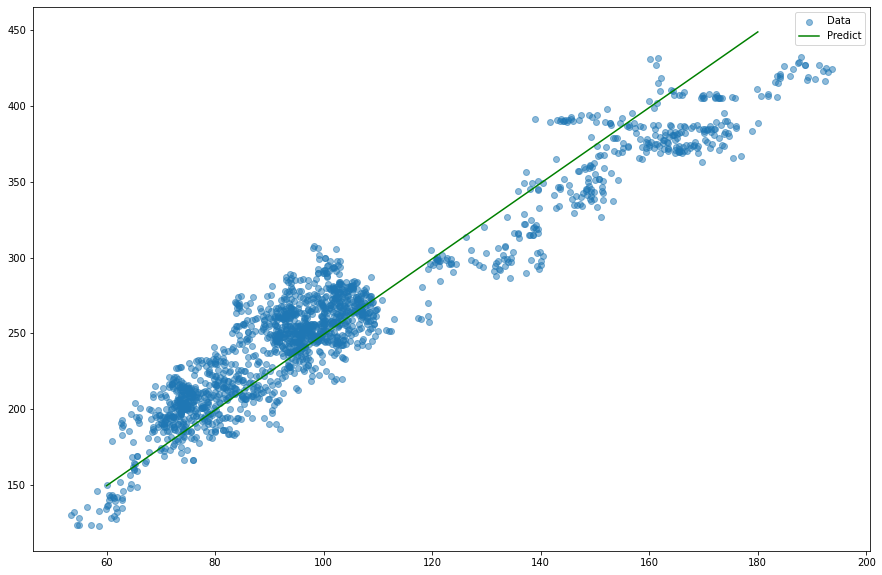

In [35]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp_new.predict(X0)

plt.figure(1, (15, 10))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(X0, Y0, 'green', label='Predict')
plt.legend()
plt.show()

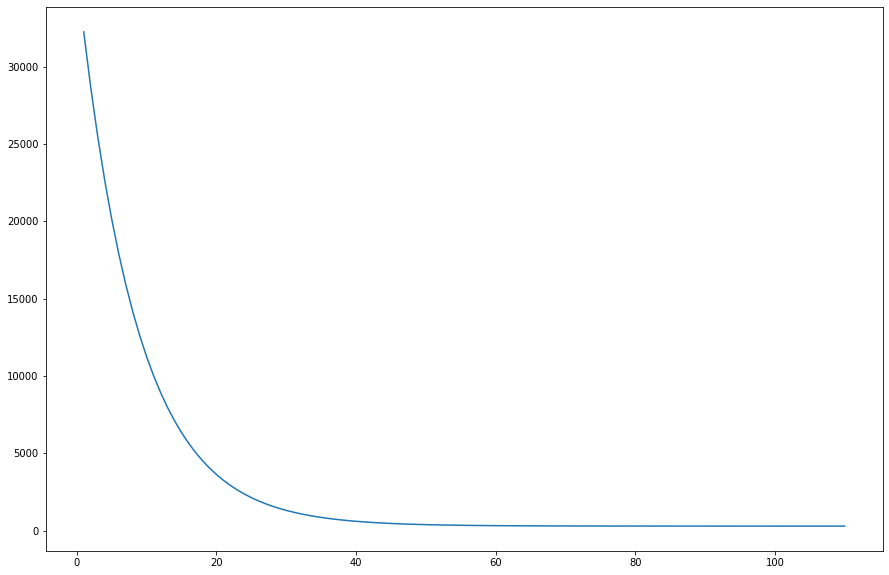

In [37]:
plt.figure(1, (15, 10))
plt.plot(steps, errors)
plt.show()

# Контрольные вопросы

#### 1.	Сформулируйте задачу регрессии.
Прогноз на основе выборки объектов с различными признаками
#### 2.	Что такое метод наименьших квадратов?
Этот методо основан на минимизации суммы квадратов отклонений некоторых функций от искомых переменных.Используют обычно для решения переопределенных систем уравнений
#### 3.	Какие функции ошибки используются в регрессионных моделях? Расскажите про три самые популярные.
1) Средний модуль отклонения (MAE)

2) Функция ошибки Хьюбера (Huber loss)

3) Средний процент отклонения (MAPE – Mean Absolute Percent Error)

#### 4.	Что показывает конкретное значение ошибки регрессии?
Велика ли ошибка значений Y на основании значения Х
#### 5.	Зачем нужно строить кривые обучения?
Визуализация хорошо ли "обучилась" модель. 